# Coursera Data Science Course Capstone Notebook

This notebook contains my work on the Coursera IBM Data Science course capstone project. Exploring the feasibility of setting up a small chain of foodstores in Toronto that sell unboxed products.

## Table of Contents

1.  [Introduction - A Chain of Foodstores in Toronto](#introduction)

2.  [Data Used for Solving the Problem](#data)

3.  [Methodology](#methodology)

4.  [Results](#results)

5.  [Discussion](#discussion)

6.  [Conclusion](#conclusion)

7.  [References](#references)

<a name="introduction"><h2>1. Introduction - A Chain of Unboxed Foodstores in Toronto</h2>

An international unboxed food store chain from Germany requires some early-stage exploration for a project in Toronto, Ontario, where they want to establish their first stores in the new world: The company seeks to set up 3 - 5 unboxed food stores in attractive locations in the city. They believe that their research – including market analysis – until now has shown that project is feasible, without having been to Toronto yet. Before a personal trip of representatives is planned, available information shall be analyzed and potentially interesting locations shall be pinpointed down to the neighborhood level, also living up to their aspiration of being as sustainable as possible and to only travel intercontinentally when needed.

I, as a data scientist, am asked to perform this investigation. As the report and perhaps also this notebook shall also be presented to investors, plain language shall be used and the work that has led to the results, the code, the data sources have to be understandable. I am therefore using this Jupyter Notebook to summarize the complete project work in one document.

To better understand the task and the conditions that need to be met to define a location as attractive we need to know a little more about the concept of unboxed stores, their potential customers, local competition they may face, and on the other hand venues that contribute to a positive ecosystem. Those are important factors contributing to the suitability of a neighborhood for an unboxed food store. The sources of information I have been using to compile the information below can be found in the [references section](#references).

### The Concept of Unboxed Food Stores

The idea of an unboxed store is relatively new and part of a zero-waste culture. Zero waste in the sense of that customers do not buy packaged goods, where the package is thrown away later, but rather bring their own jars, reusable bags, and boxes to the store and measure the foods and other goods they need into those. Another aspect of zero waste is that customers only buy what they need and not too much which may spoil and land in the garbage bin.  

The typical product range of an unboxed store consists of bulk foods, both fresh (e.g. vegetables, dairy products) and durable (flour, rice, pasta, etc.), as well as personal care (shampoo, soap, cosmetics, etc.) and household (detergents, dish washer tabs, etc.) products. Other products of services may be available as well, larger stores can have bakeries, butcheries, or catering services. Products will often be organic and locally sourced.

### Who Are the Customers of an Unboxed Store?

Typically, these will be younger, educated people between 18 and 30 (perhaps up to 40) years old with an open mind, curiosity, and a strong interest in sustainability and eco-friendliness. They will be less prone to reservations regarding hygiene, which is often heard as a reason for not buying unpackaged goods. My customer's experience in Germany is that the target group for these stores will hardly ever use a car to reach the them, but rather use public transport or simply walk.

### Who Are are the Competitors of Unboxed Food Stores?

The fiercest competitors, if you want to call them that, will be other unboxed stores close by. Although the concept is still fairly new and driven by an idealistic spirit which includes mutual support, as the experience in Germany shows, this will be less the case if the competitor is a chain. Other competitors will be organic food stores, because of the overlap in offering (organic and locally sourced), as well as that they also – to a smaller extent – offer unpackaged goods themselves. Perhaps also the odd high-quality conventional grocery store / supermarket may compete if chosen for convenience purposes.

### Who are Good Neighbors for an Unboxed Store?

These are venues that are preferred by the same target group and include universities and high schools, organic clothing stores, and similar. 

### Defining Ideal Locations and Their Properties

The previous two sections allow us to conclude that the ideal location will be in an area highly frequented by the target group during opening times, meaning close, within walking distance, to venues of the above type. Additionally, it should be as far as possible from competitors.

### Summarizing the Task – Classifying Toronto Neighborhoods by Suitability as a Location for Unboxed Food Stores

With the explanations given above it is clear that we are looking at a classification problem. The task is to classify neighborhoods by degree of attractiveness to suggest the best location and at the same time provide alternatives if the ideal is not available.

We have come to an agreement to, for this initial analysis, to look at and classify neighborhoods by the parameters below, listed by order of importance to my customer:
1. Pedestrian traffic during opening hours,
2. Number of other venues preferred by the target group within a radius of 500 m around the neighborhood geographical coordinates,
3. Number of competitors in the same radius.

Results shall be given in a tabulated form only considering the neighborhoods in top three classes, ranked 1 (most attractive), 2 (attractive), 3 (somewhat attractive). Should the number of neighborhoods in those classes be below 20, classes 4 and 5 will be added. The classes shall be defined in a way that they can be clearly distinguished. The details are left to me after an initial inspection of available data.

<a name="data"><h2>2. Data Used for Solving the Problem</h2></a>

Starting from scratch we will need the following data for our task: 
* A list of Toronto neighborhoods including geographical coordinates,
* Lists of venues, either “friendly” or competitors, including geographical coordinates,
* Pedestrian traffic data during opening hours including geographic coordinates of the points of measurement.

### Obtaining Neighborhood Information

Through web search I have found a Wikipedia page with the Toronto postcodes, which also contains a column with neighborhood names, as this sample shows:

<table class>
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
</tbody>
</table>

The link to the table can be found in the [references section](#references). We will scrape (extract) the neighborhoods from the column **Neighbourhood** in this table and add geographical coordinates later.

### Getting venue Information

Through experience with previous projects, I have learnt that Foursquare provides an API-accessible database of venues of many different kinds, including those we are looking for, with geographical coordinates. Results from API calls are returned as JSON objects, a sample results excerpt for a search on **Grocery Stores** in the neighborhood **Harbourfront** is shown here:

    {'meta': {'code': 200, 'requestId': '60423c86e5a64f3430f5405c'},
     'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
     'response': {'venues': [{'id': '5ab2c59cbcbf7a2bb07150eb',
        'name': 'Walmart Grocery Pickup & Delivery - Penguin Pickup',
        'location': {'address': '228 Queens Quay West',
         'lat': 43.63956472908312,
         'lng': -79.38374507860088,
         'labeledLatLngs': [{'label': 'display',
           'lat': 43.63956472908312,
           'lng': -79.38374507860088}],
         'distance': 55,
         'postalCode': 'M5J 1A1',
         'cc': 'CA',
         'city': 'Toronto',
         'state': 'ON',
         'country': 'Canada',
         'formattedAddress': ['228 Queens Quay West',
          'Toronto ON M5J 1A1',
          'Canada']},
        'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
          'name': 'Supermarket',
          'pluralName': 'Supermarkets',
          'shortName': 'Supermarket',
          'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
           'suffix': '.png'},
          'primary': True}],
        'venuePage': {'id': '598412013'},
        'referralId': 'v-1614953606',
        'hasPerk': False},
        ...

It looks a bit bulky at first glance but provides a clear and easy to access data structure. Code used to access the Foursquare API is shown in the next section on methodology.

### Pedestrian Traffic

Through a web search I was able to find a fairly close match to what we are actually looking for, data published by the Toronto city council on traffic counts (both pedestrian and vehicles) at intersections with traffic lights during peak hours, typically collected between 7:30 am to 6:00 pm. This was the best fitting information I could find both with regards to time, as normal store opening hours in Toronto roughly fall into this period, and location, as the intersections can be associated with neighborhoods by the names of the intersecting streets, or even better by their geographical location:


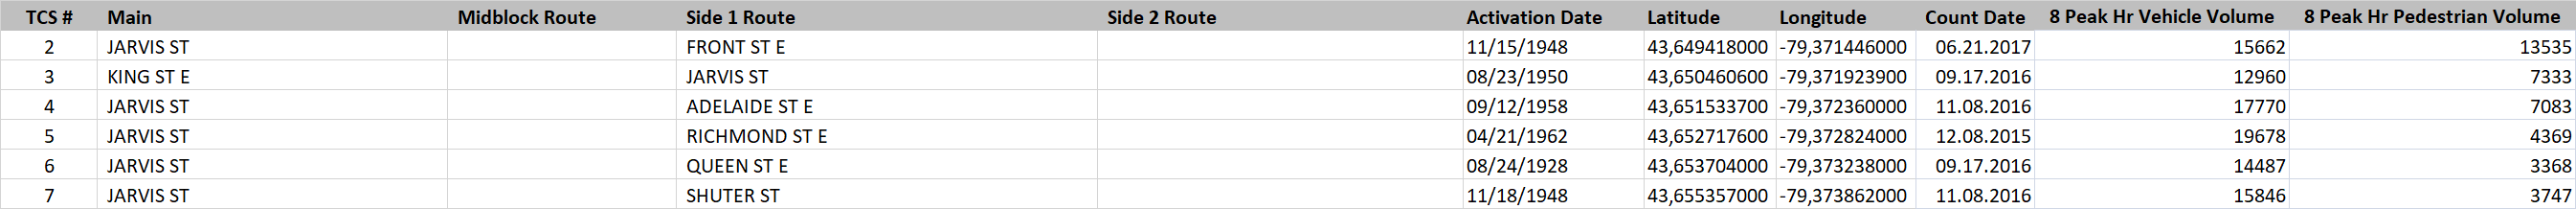

Again, source information can be found in the [references section](#references), it's an Excel file that can be downloaded at the web address given. As the above sample shows, the table even contains geographical coordinates in the columns **Latitude** and **Longitude**, apart from the sought after pesdestian traffic data in the column **8 Peak Hr Pedestrian Volume**. The other columns are not of relevance for this project. The table is fairly up to date, the data was collected between 2011 and 2019.

### Geographical coordinates

In cases where geographical coordinates are not included with the data, as is the case for the table with the neighborhood names, I obtain them by accessing the Microsoft Bing Maps API. I pass an according search term to the API, here the city and neighborhood name, e.g. **Toronto, ON , Harbourfront**, to get the coordinates returned:

    Toronto, ON, Canada, (43.639190673828125, -79.38420104980469, 0.0)

Again, the next section contains more information on how these calls are done.

<a name="methodology"><h2>3. Methodology</h2></a>

<a name="results"><h2>4. Results</h2></a>

<a name="discussion"><h2>5. Discussion</h2></a>

<a name="conclusion"><h2>6. Conclusion</h2></a>

<a name="references"><h2>7. References</h2></a>

I am collecting information on the sources I have used in the simple structure below.

### Section 1., Introduction

#### Sample page of a Toronto unboxed store
https://unboxedmarket.com/ (accessed 2021-03-02)

#### Information on the business model of an unboxed store
https://gruenderplattform.de/geschaeftsideen/unverpackt-laden-eroeffnen (accessed 2021-03-02) 
This is a web portal by the German ministry of commerce and the German government’s promotional bank KfW for startups and young entrepreneurs, page on opening an unboxed store, text in German.

### Section 2., Data Used for Solving the Problem 

#### List of Toronto postcodes by Wikipedia
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M (accessed 2021-03-05)
This list also contains neighborhood information.

#### Table with pedestrian traffic information by the Toronto city council
https://ckan0.cf.opendata.inter.prod-toronto.ca/en/dataset/traffic-signal-vehicle-and-pedestrian-volumes (accessed 2021-03-04)
Excel file and readme document with pedestrian and vehicle traffic volumes at signaled intersections in Toronto.